In [18]:
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('student-mat.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [56]:
predict = "G3" #this is the label which is what you are trying the predict
training_data = data[["G1", "G2", "G3","studytime", "failures", "absences"]] #attributes or features
X = np.array(training_data.drop(columns=[predict], axis=1)) #this is our training data without the label we are going to predict
y = np.array(training_data[predict]) #this is only the label we are trying to predict using the regression 
#linear_model = LinearRegression()
#split the data 
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.1)
best = 0
for x in range(1000):
    linear_model.fit(train_x, train_y) #fit the model to the data using a linear regression 
    accuracy = linear_model.score(test_x, test_y) #this is going to test the accuracy of our model 
    if accuracy > best:
        best = accuracy
    
print(accuracy) #not bad! changes slightly everytime

0.8784144895388221


In [25]:
#now that we have a model, let's see the coefficients and intercept 
print("coefficients: \n", linear_model.coef_)
print("Intercept: \n", linear_model.intercept_)

coefficients: 
 [ 0.15308518  0.9758306  -0.24889348 -0.38401008  0.03684374]
Intercept: 
 -1.32981771644371


Notice that there are 5 coefficients because there are 5 variables ["G1", "G2","studytime", "failures", "absences"]
the higher the coefficient number the more weight the variable carries

In [77]:
#this is how we predict scores with this model 
predictions = linear_model.predict(test_x)
errors = []
for x in range(len(predictions)): 
    error = abs(predictions[x] - test_y[x])
    print(int(predictions[x]), test_x[x], test_y[x], "error: ", error) #test_x is an array and so is test_y so we are printing all of the values in them 
    errors.append(error)
    
print("\n max: ", max(errors), "min: ", min(errors))     

8 [10  9  2  0  4] 9 error:  0.3035143640808453
11 [12 12  4  0  1] 12 error:  0.6010140513463078
14 [15 14  2  0  2] 14 error:  0.29782792629086785
10 [11 11  2  0  2] 10 error:  0.7294970971576156
10 [11 11  3  0  0] 10 error:  0.4473018713321917
9 [ 7 10  2  0  0] 11 error:  1.9732497803276718
14 [14 14  1  0  2] 13 error:  1.345765733659574
11 [ 9 12  3  0  3] 11 error:  0.1788986457076387
19 [18 19  1  0  6] 19 error:  0.9801702410394668
5 [8 7 2 3 8] 8 error:  2.3907566619560594
10 [10 11  2  0  2] 11 error:  0.4379304124328769
8 [7 9 1 1 2] 8 error:  0.024860769936491778
10 [11 11  2  0  4] 11 error:  0.203672993976161
10 [11 11  3  0  3] 11 error:  0.4524532653684723
7 [9 8 2 1 0] 0 error:  7.111313633034957
18 [16 18  2  0  0] 18 error:  0.2632532480435188
13 [14 13  2  0  2] 13 error:  0.16419348644328124
5 [7 7 2 1 0] 0 error:  5.810251683596877
4 [6 5 2 0 6] 6 error:  1.7712222146049719
4 [7 6 1 2 0] 0 error:  4.741532324994818
16 [15 16  1  0  4] 15 error:  1.5124370126304

<h1>Save Model 

In [43]:
import pickle
with open('studentmodel.pickle', "wb") as f:
    pickle.dump(linear_model, f)
    
with open("studentmodel.pickle", "rb") as f:
    #pickle_in = pickle.load("student-model.pickle")
    loaded_model = pickle.load(f)
    #loaded_model = pickle.load(pickle_in)

In [45]:
loaded_accuracy = loaded_model.score(test_x, test_y)
print(loaded_accuracy) #notice that it is the same as the other score which means it saved that instance of the model, so it's good!

0.9298052869210224


Now that we have saved this, let's try and reach a score of 95% and keep working and saving until we get that score. note the score or prediction accuracy is different every time because when use the train_split and takes a random set within that data to separate into the test and split data sets. So we get a different set of training data every time we run it. 

In [82]:
best = 0
for x in range(1000):
    train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.1)
    linear_model = LinearRegression()
    linear_model.fit(train_x, train_y) #fit the model to the data using a linear regression, aka find a straight-line fit to points
    accuracy = linear_model.score(test_x, test_y) 
    if accuracy > best:
        best = accuracy
print(best)

#save the best model
with open('studentmodel.pickle', "wb") as f:
    pickle.dump(linear_model, f)
    
with open("studentmodel.pickle", "rb") as f:
    #pickle_in = pickle.load("student-model.pickle")
    best_model = pickle.load(f)
    #loaded_model = pickle.load(pickle_in)"""
print(best_model)

0.9611422080247465
LinearRegression()


In [84]:
#we now have over 95% 
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.1)
print(best_model.score(test_x, test_y))
print(best_model.predict(test_x))

0.9079999691153391
[13.86698504  8.46520808 13.50299408  5.09212121 10.72682289 12.40689889
  4.39358596  9.11272463  9.55356371  8.21002443  6.53927248 13.73209921
  4.31254047  7.42686491 15.69154189 12.84230371 19.06294205 -1.59467758
  7.99271739 15.60275684 18.11301443 15.59893725  8.69431322 10.10379851
  4.51333385  8.61573991 14.00235061 12.00004663  7.69687551 12.64756318
 12.77061245 14.92097607 11.8877273  15.1454041  14.84928481 13.46288423
  8.06440866  7.26783452 13.22882271  9.50220571]


<h2>Let's visualize our data for a client 

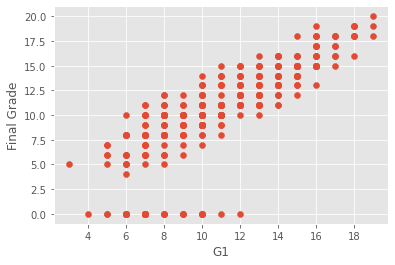

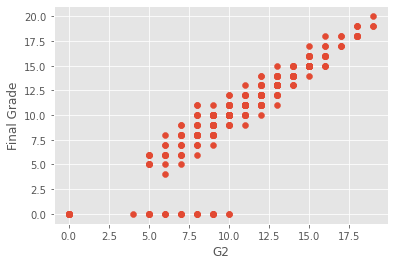

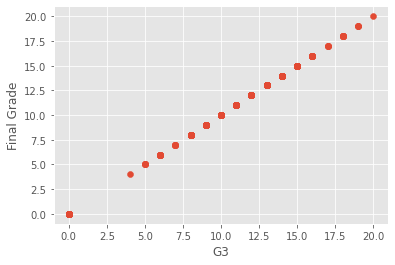

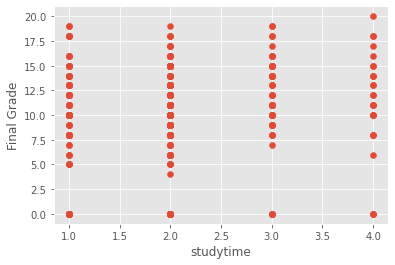

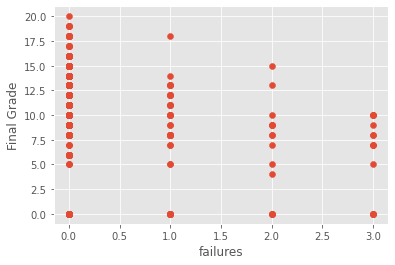

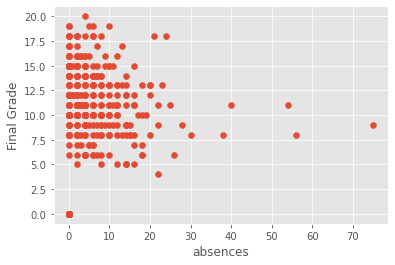

In [93]:
#lets make our grid look proffessional 
plt.style.use("ggplot")
features_list = ["G1", "G2", "G3","studytime", "failures", "absences"]
prediction = "studytime" #change this with the different features "G1, G2, etc. studytime"
for feature in features_list:
    plt.scatter(data[feature], data["G3"])
    plt.xlabel(feature) #changed from x_label
    plt.ylabel("Final Grade") #changed from y_label
    plt.show()